/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


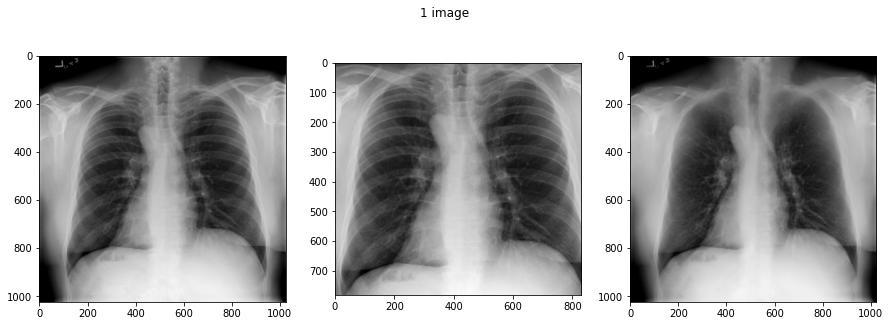

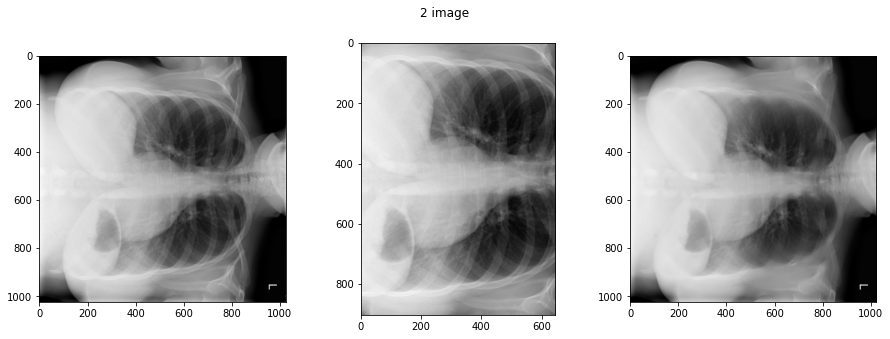

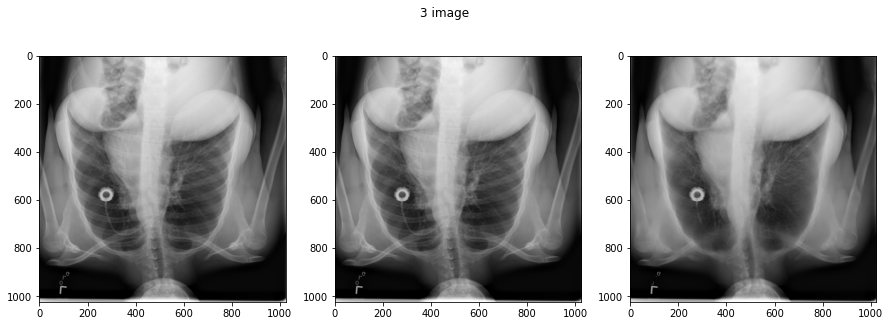

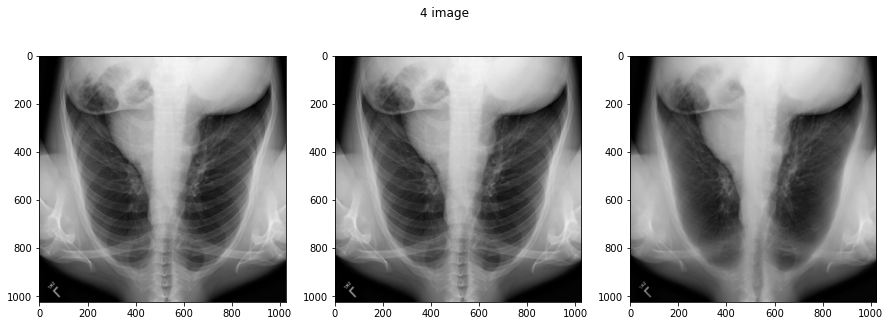

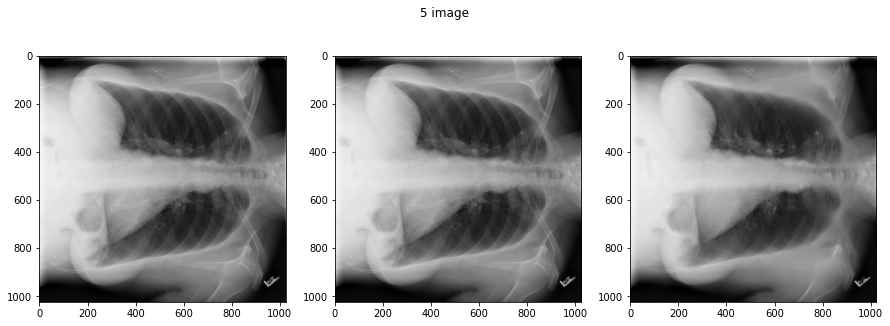

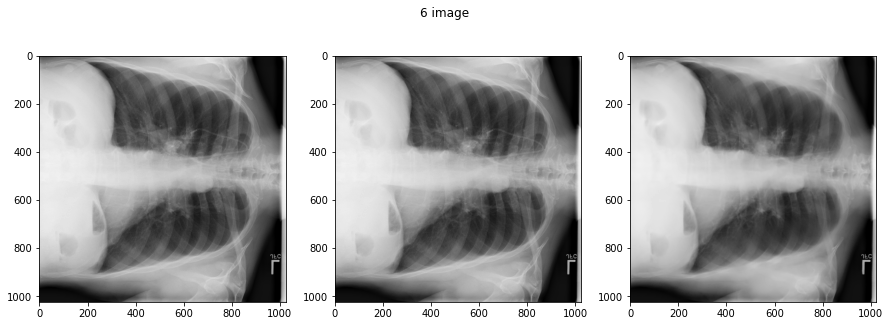

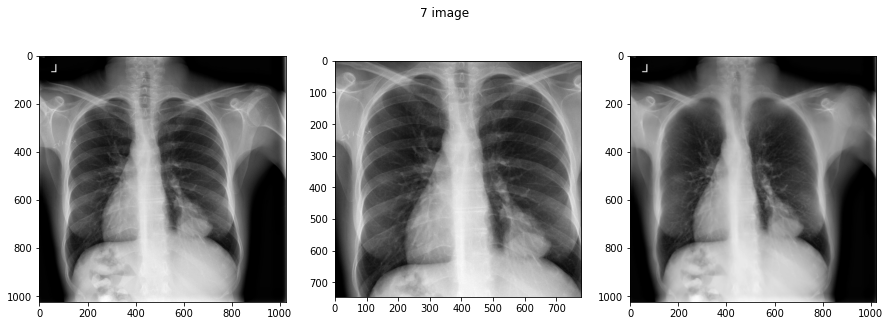

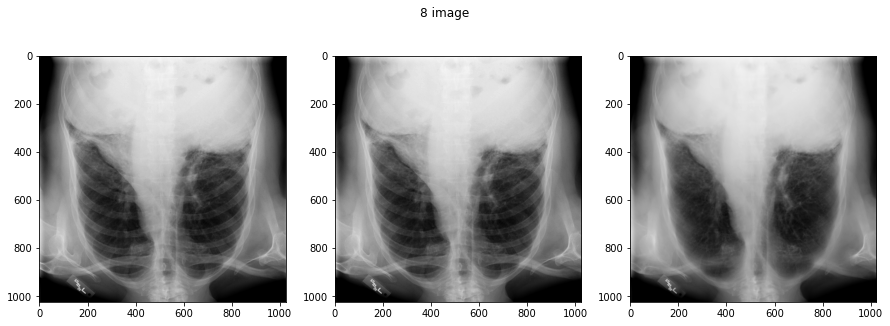

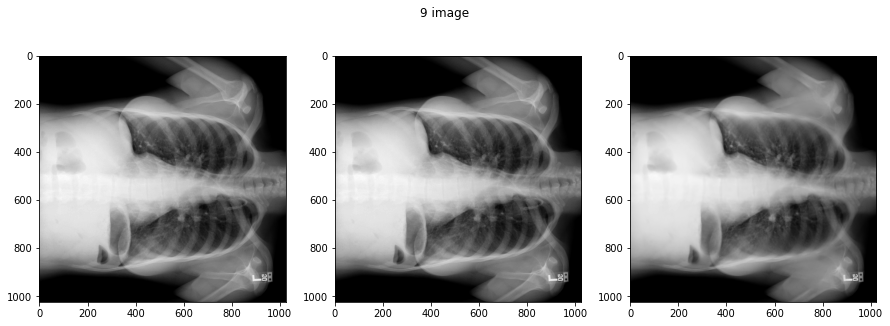

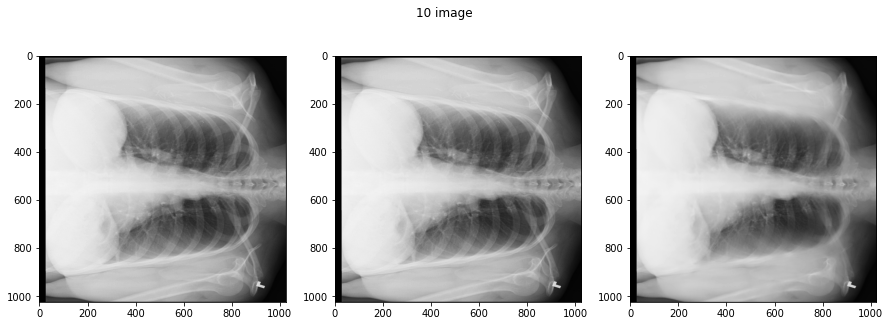

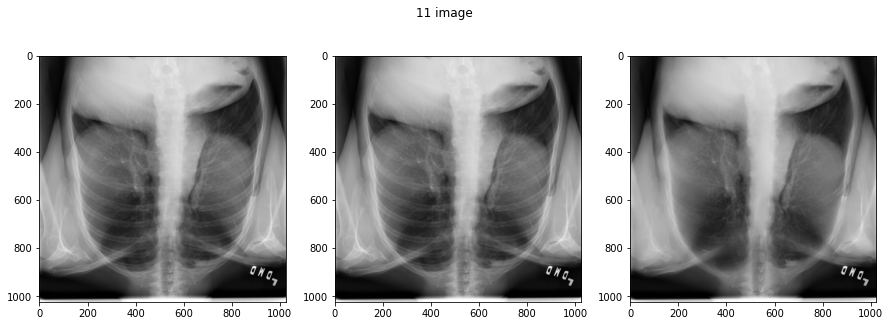

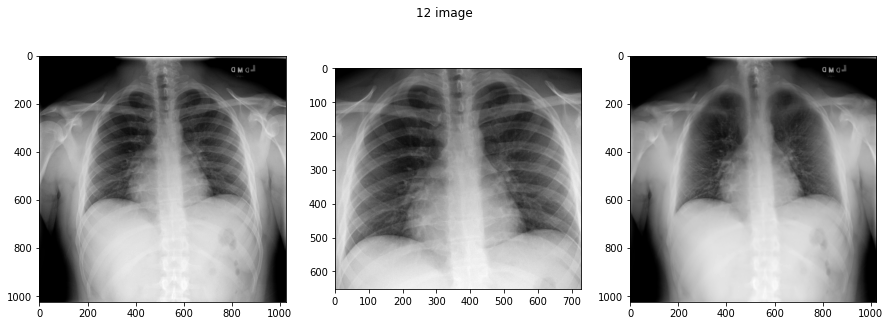

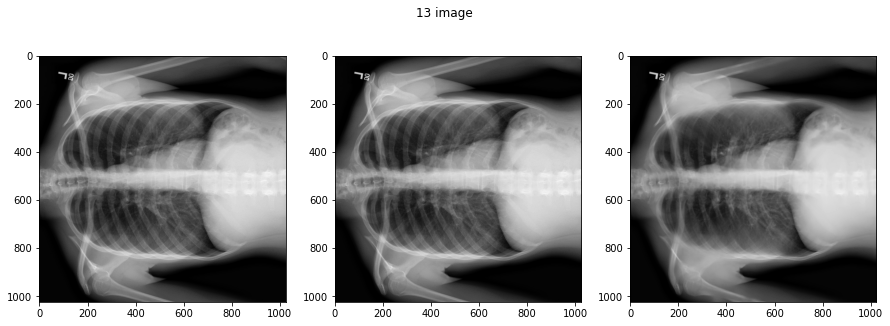

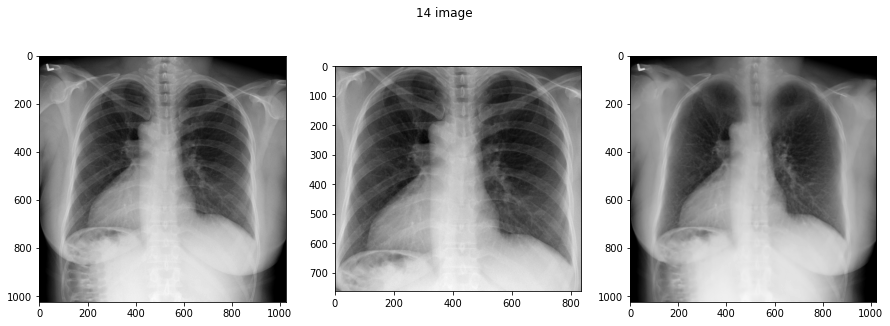

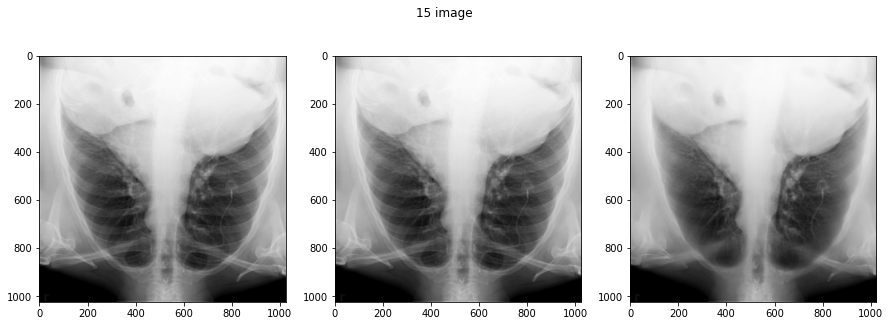

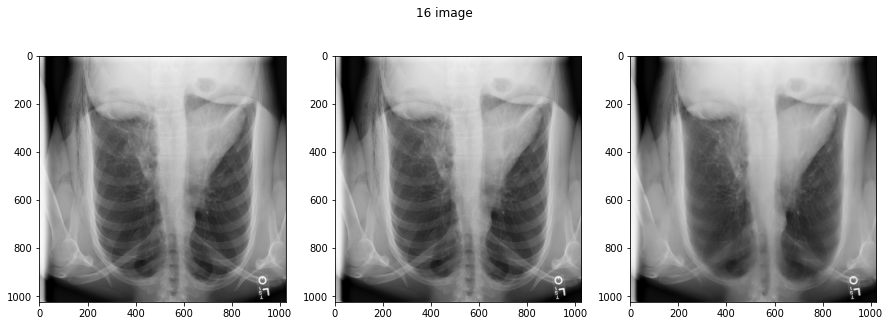

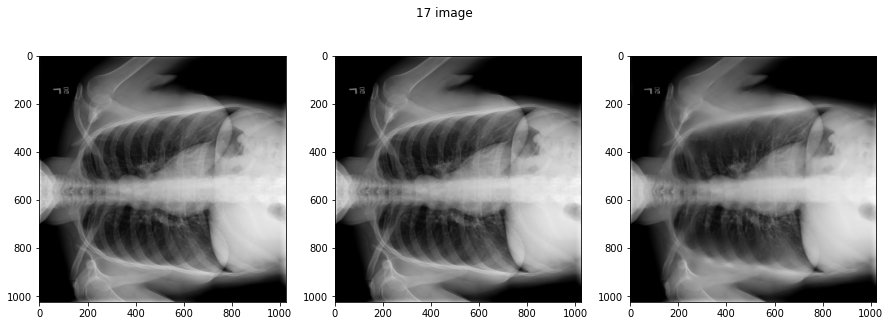

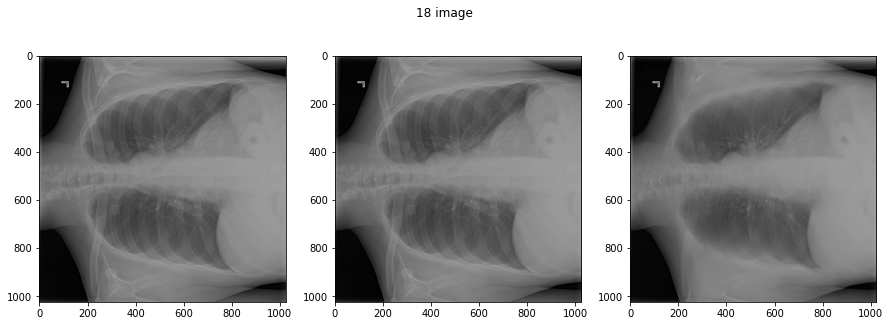

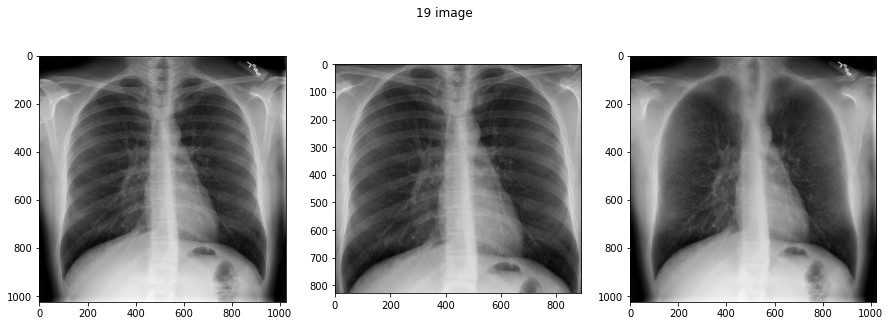

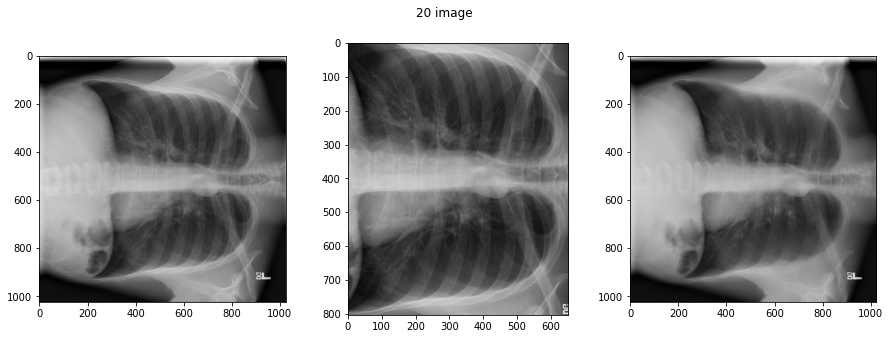

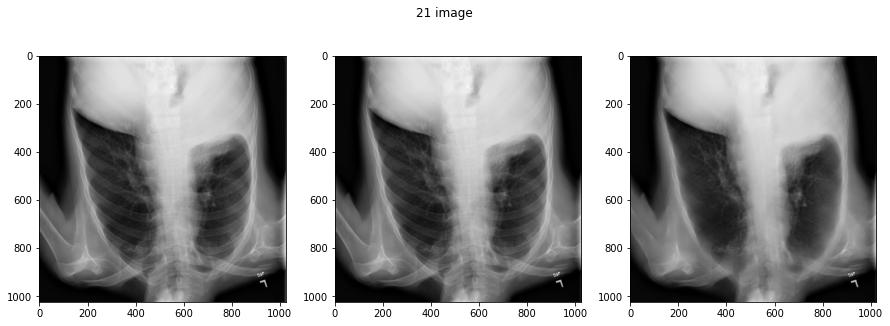

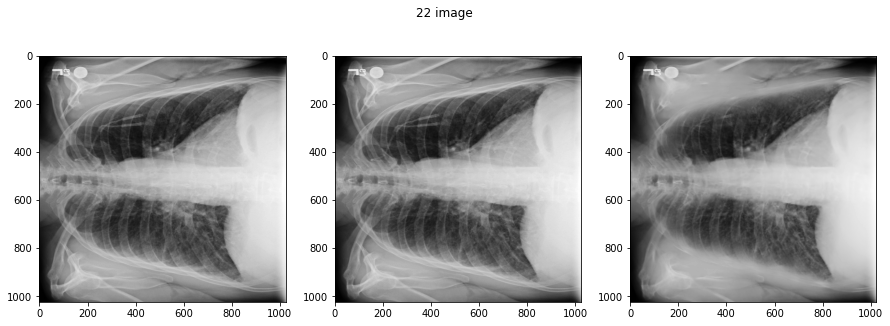

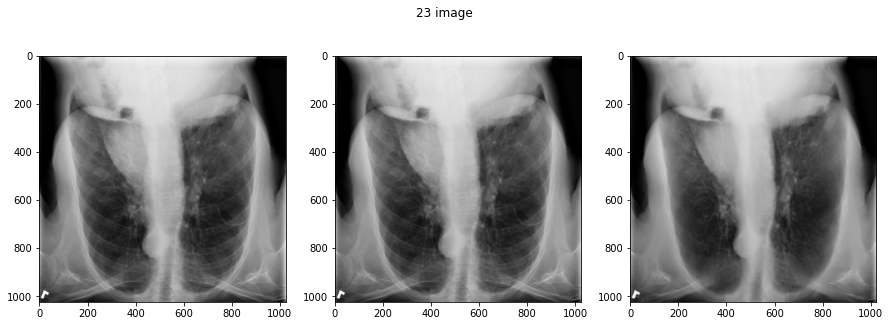

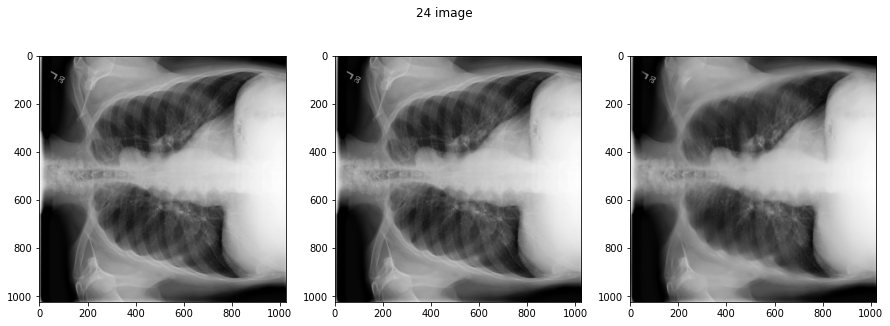

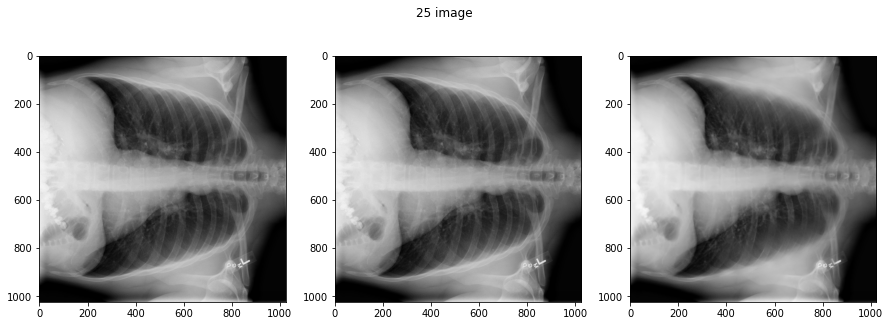

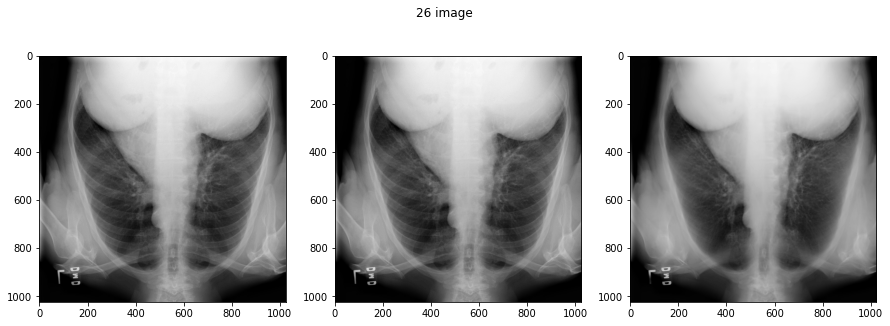

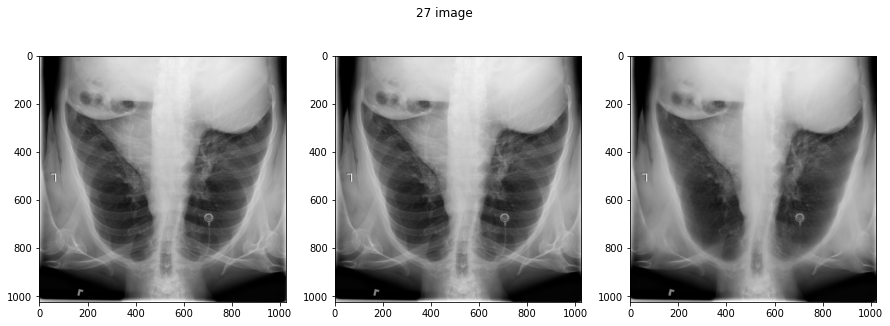

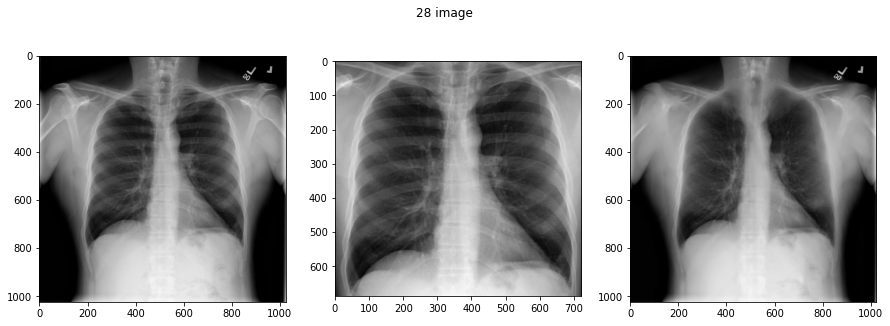

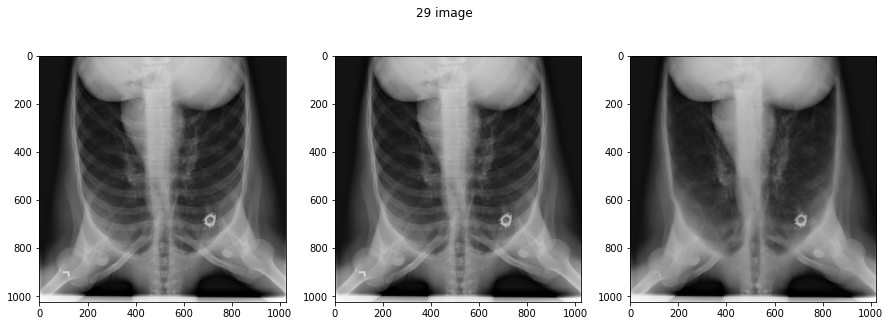

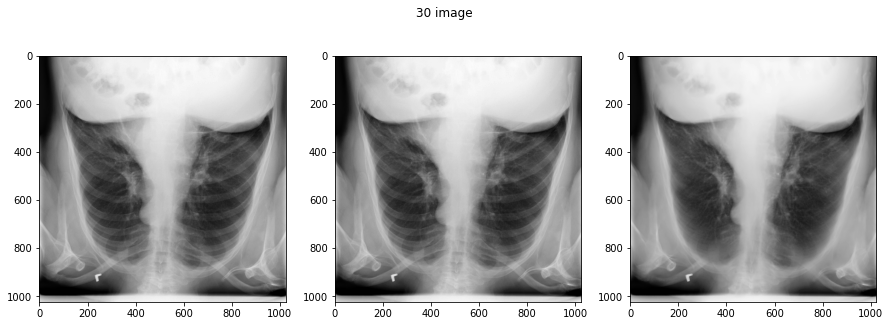

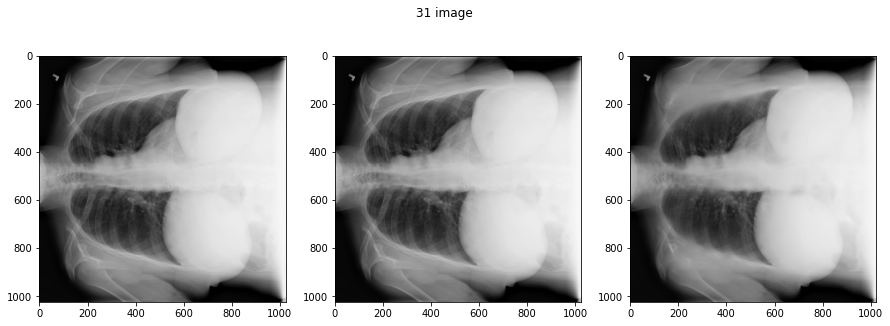

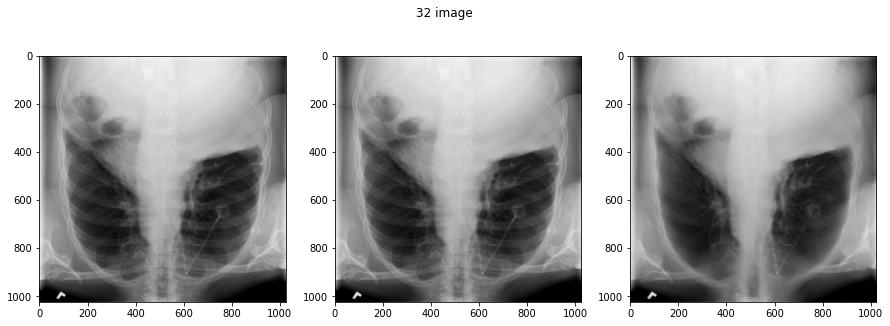

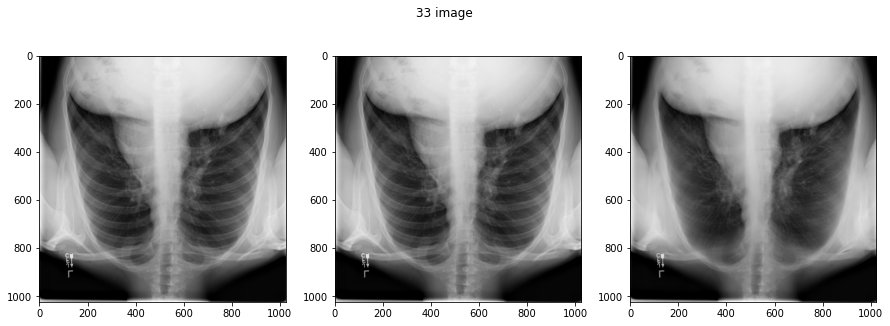

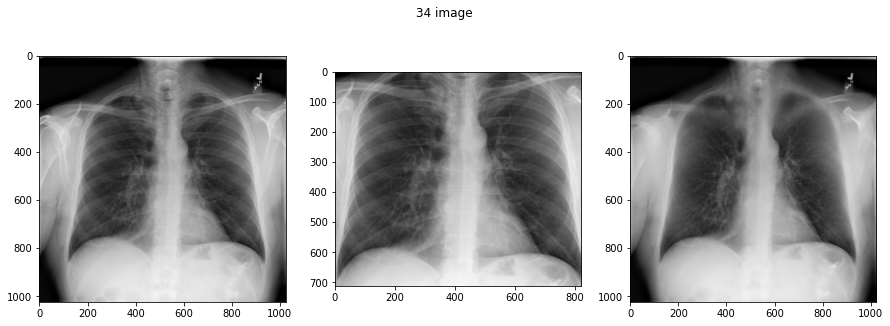

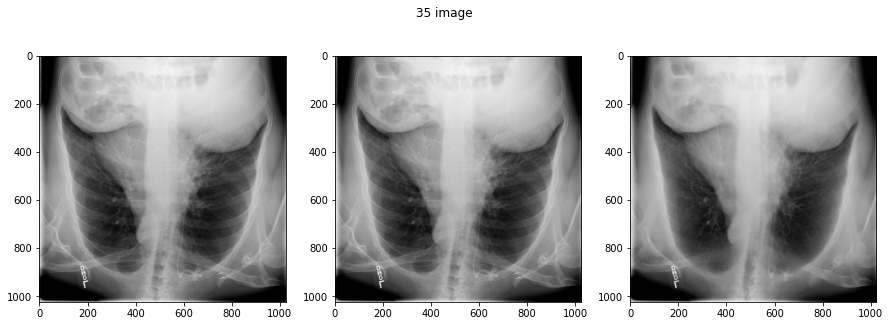

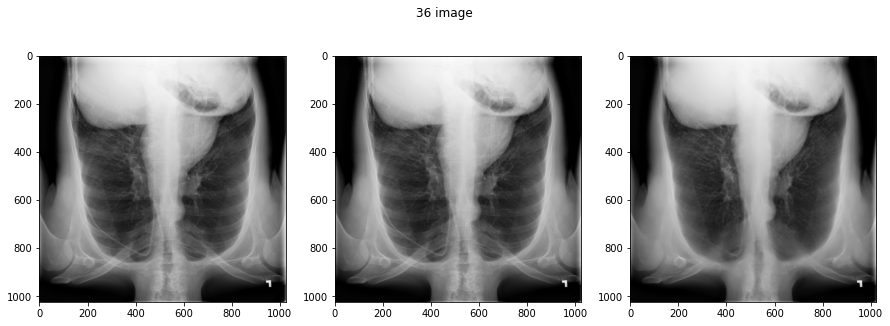

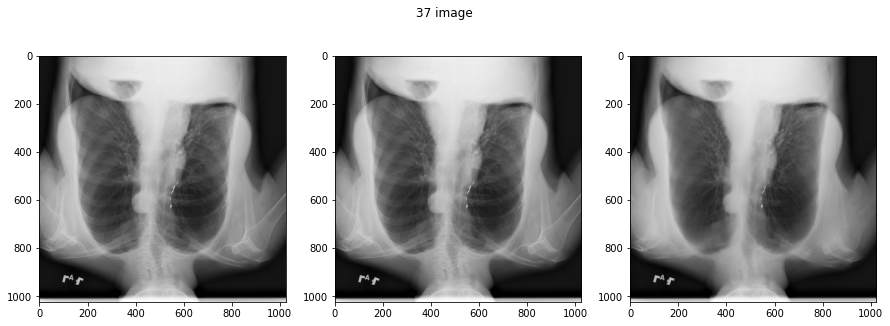

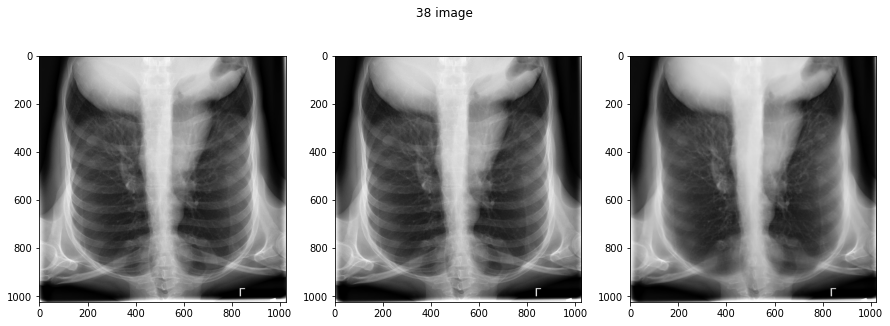

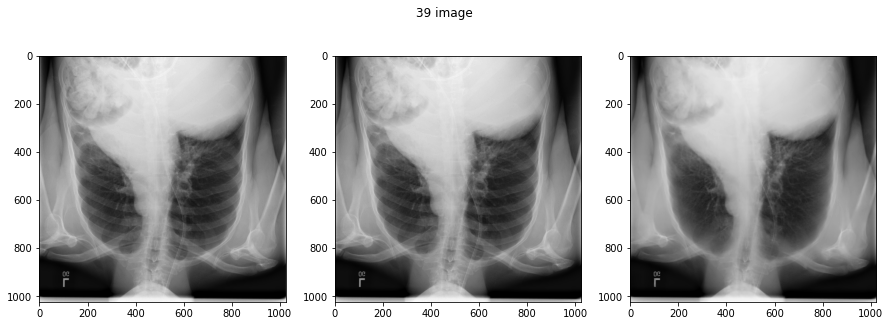

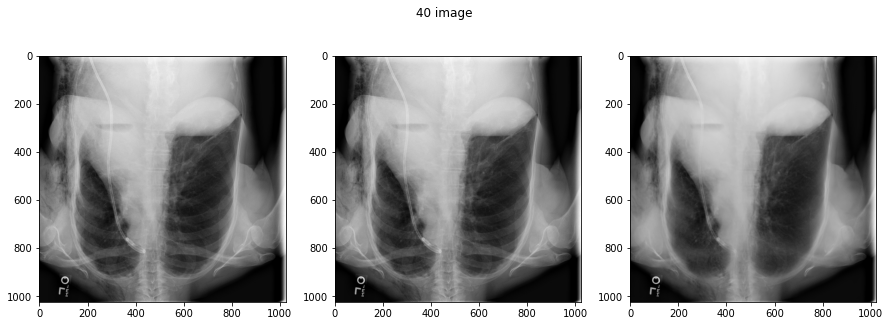

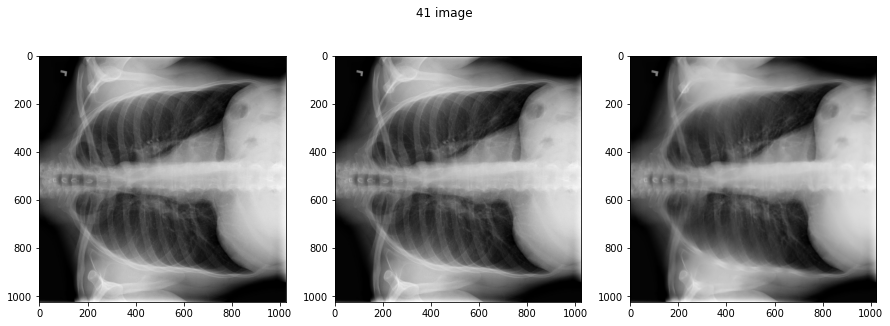

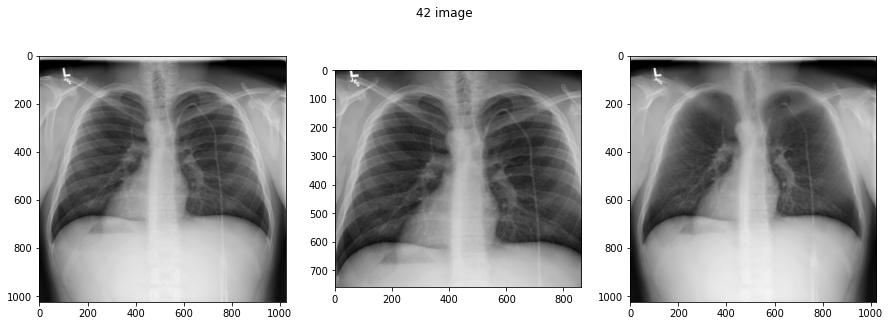

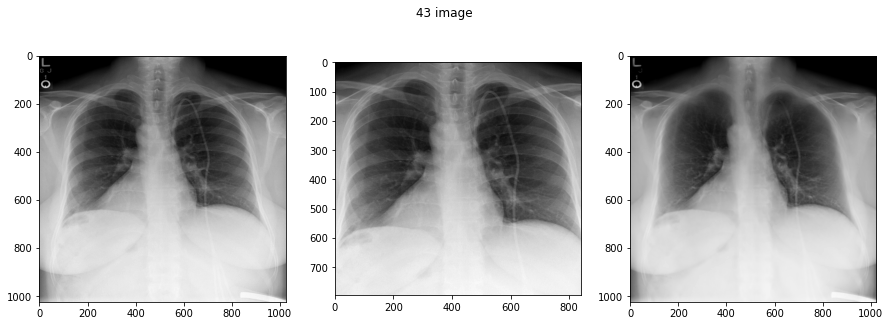

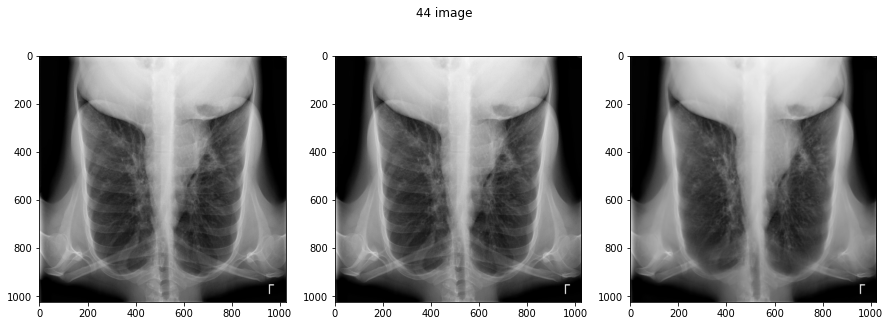

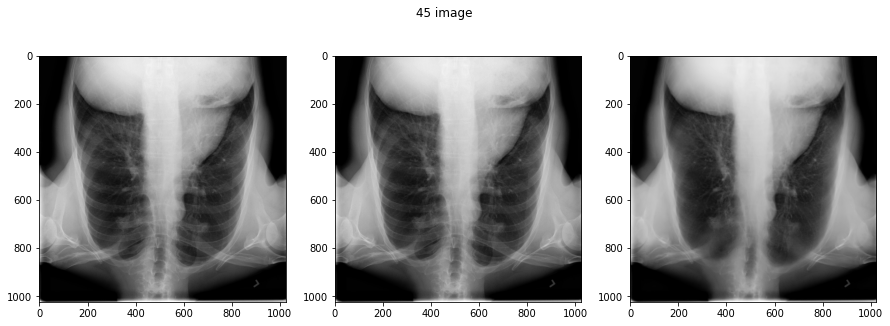

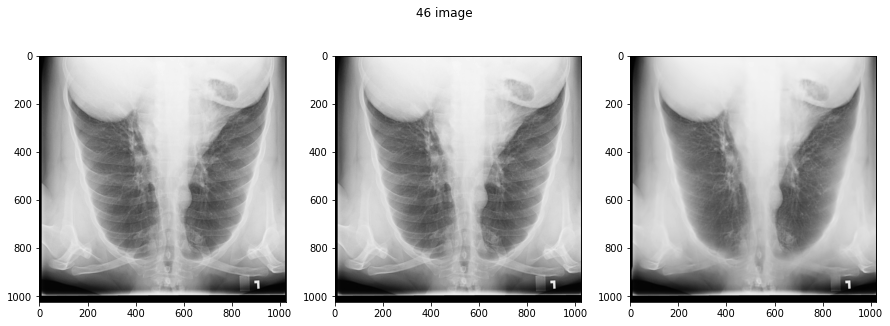

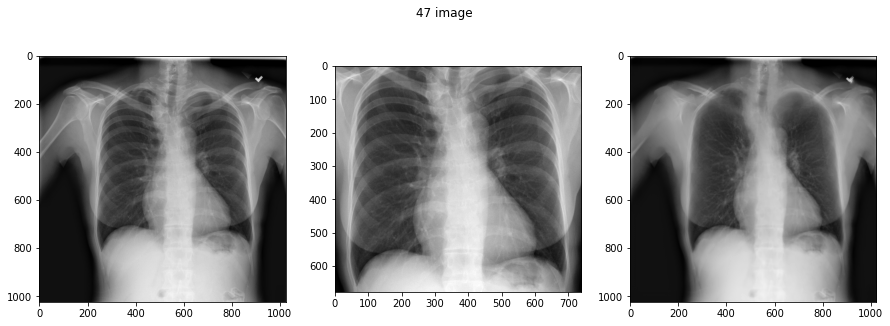

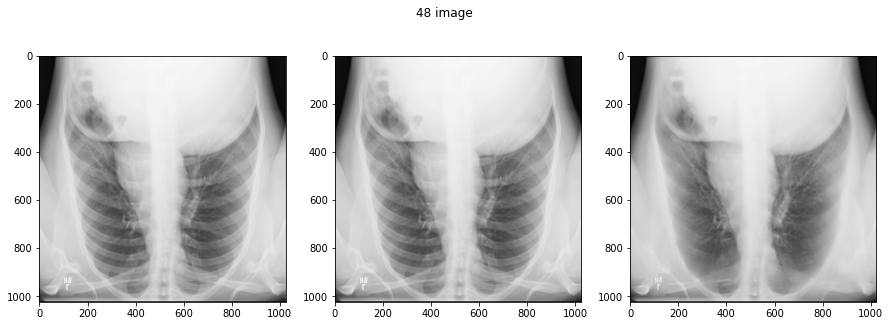

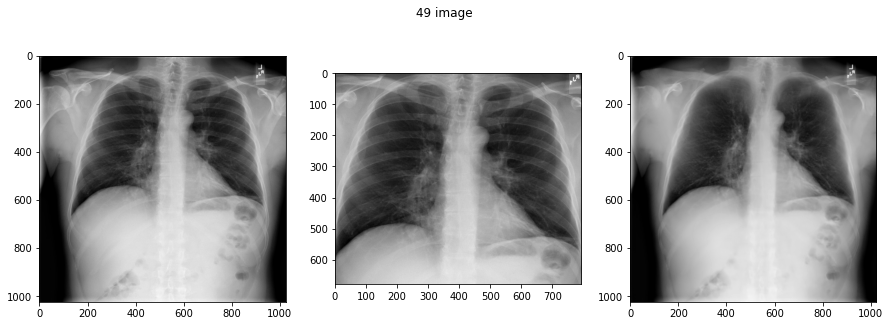

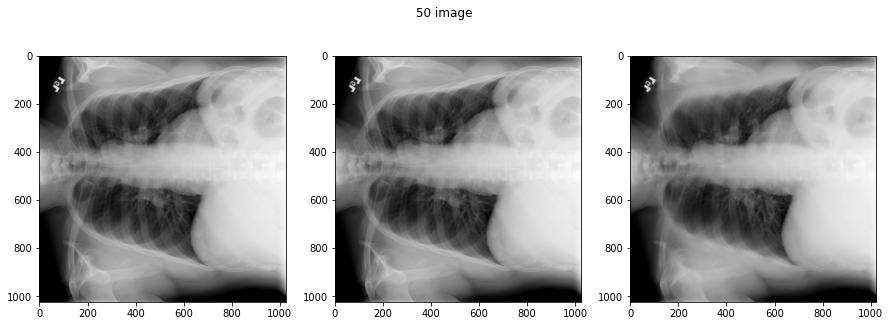

In [1]:
from purelung import augmentations as aug
from purelung import auxiliary as aux
import albumentations as A
import os
import cv2
import matplotlib.pyplot as plt



crop = aug.LungCrop()
suppression = aug.RibSuppression()
rotation = A.Compose([
        A.OneOf([
            A.RandomRotate90(p=1),
            A.Flip(p=1)
        ], p=1),
    ], p=1)

for i in range(50):
    image = cv2.imread('/home/intern/extreme/' + str(i+1) + '.png', 0)
    image = rotation(image=image)['image']    
    cropped = crop(image=image)
    suppressed = suppression(image=image)
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    fig.suptitle(str(i+1) + " image")
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(cropped['image'], cmap='gray')
    ax[2].imshow(suppressed['image'], cmap='gray')
    